# Created by: Muhamad Luthfi Farid Sidik
03 Februari 2024

In [19]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [20]:
!wget --no-check-certificate \
  https://github.com/mluthfifrd/ML-Image-Classification/raw/master/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2024-02-04 01:37:05--  https://github.com/mluthfifrd/ML-Image-Classification/raw/master/rockpaperscissors.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/mluthfifrd/ML-Image-Classification/master/rockpaperscissors.zip [following]
--2024-02-04 01:37:05--  https://media.githubusercontent.com/media/mluthfifrd/ML-Image-Classification/master/rockpaperscissors.zip
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 321525372 (307M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 306.63M   229MB/s    in 1.3s    

2024-02-04 01:

In [21]:
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/rockpaperscissors'
train_dir = os.path.join(base_dir, 'training-set')
validation_dir = os.path.join(base_dir, 'validation-set')

In [22]:
os.listdir('/tmp/rockpaperscissors/training-set')

['rock', 'scissors', 'paper']

In [23]:
os.listdir('/tmp/rockpaperscissors/validation-set')

['rock', 'scissors', 'paper']

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    brightness_range=[0.5, 1.5], #Menerapkan augmentasi gambar tambahan.
)

validation_datagen = ImageDataGenerator(
    rescale=1./255,
    brightness_range=[0.5, 1.5], #Menerapkan augmentasi gambar tambahan.
)

In [25]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(200, 200),
        batch_size=4,
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(200, 200),
        batch_size=4,
        class_mode='categorical')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [26]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'), # Menerapkan hidden layer tambahan.
    tf.keras.layers.Dense(128, activation='relu'), # Menerapkan hidden layer tambahan.
    tf.keras.layers.Dense(3, activation='softmax')
])

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 99, 99, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 48, 48, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 23, 23, 128)      

In [28]:
model.compile(loss='categorical_crossentropy', #Menggunakan loss function categorical.
              optimizer='sgd', #Menggunakan optimizer Stochastic Gradient Descent (SGD).
              metrics=['accuracy'])

Epoch 1/30
328/328 [==============================] - 28s 82ms/step - loss: 1.0905 - accuracy: 0.3824 - val_loss: 1.0405 - val_accuracy: 0.6743
Epoch 2/30
328/328 [==============================] - 25s 75ms/step - loss: 0.8905 - accuracy: 0.5916 - val_loss: 0.5521 - val_accuracy: 0.8211
Epoch 3/30
328/328 [==============================] - 24s 73ms/step - loss: 0.5911 - accuracy: 0.7557 - val_loss: 0.3600 - val_accuracy: 0.8750
Epoch 4/30
328/328 [==============================] - 23s 71ms/step - loss: 0.4532 - accuracy: 0.8435 - val_loss: 0.2733 - val_accuracy: 0.9174
Epoch 5/30
328/328 [==============================] - 24s 72ms/step - loss: 0.3030 - accuracy: 0.8954 - val_loss: 0.3657 - val_accuracy: 0.8945
Epoch 6/30
328/328 [==============================] - 25s 77ms/step - loss: 0.2841 - accuracy: 0.9023 - val_loss: 0.2391 - val_accuracy: 0.9266
Epoch 7/30
328/328 [==============================] - 25s 78ms/step - loss: 0.2366 - accuracy: 0.9176 - val_loss: 0.1499 - val_accuracy:

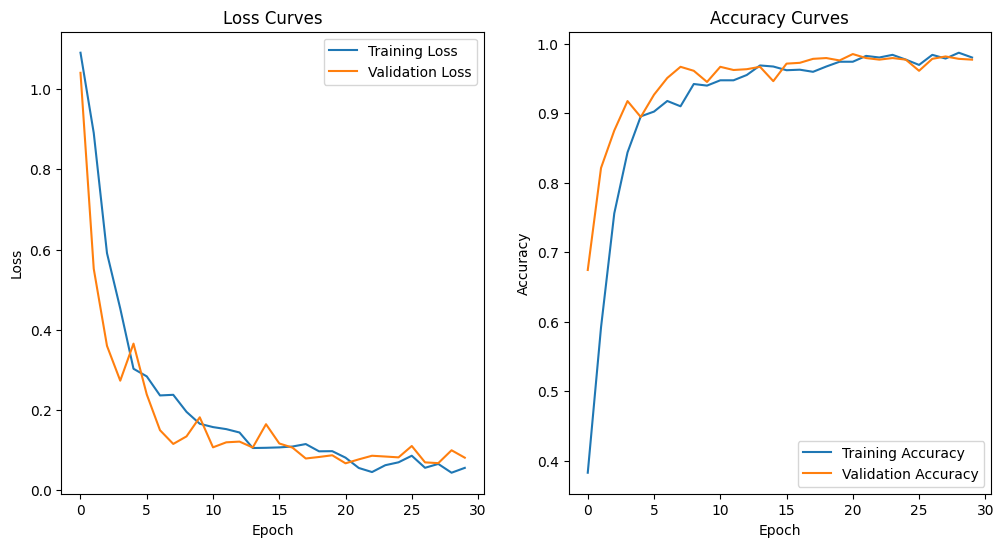

In [29]:
# Pelatihan model menggunakan runtime T4 GPU.

batch_size = 4

total_train_images = 1314
total_validation_images = 874

steps_per_epochs = total_train_images // batch_size
validation_steps = total_validation_images // batch_size

history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epochs,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    verbose=1
)

import numpy as np

best_epoch = np.argmax(history.history['val_accuracy']) + 1
best_val_accuracy = history.history['val_accuracy'][best_epoch - 1]

print(f"Epoch terbaik: {best_epoch}")
print(f"Akurasi terbaik pada data validasi: {best_val_accuracy}")

import matplotlib.pyplot as plt

train_loss = history.history['loss']
train_accuracy = history.history['accuracy']

val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

# Plot loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.title('Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.show()

Saving image.png to image.png


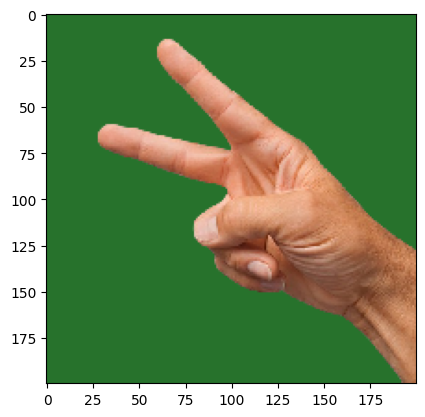

1/1 [==============================] - 0s 17ms/step
Gunting
Persentase Akurasi: 84.20484662055969 %


In [44]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
    path = fn
    img = image.load_img(path, target_size=(200, 200))
    plt.imshow(img)
    plt.show()

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x /= 255.0

    classes_prob = model.predict(x)
    predicted_class = np.argmax(classes_prob)
    predicted_prob = classes_prob[0][predicted_class] * 100

    if predicted_class == 0:
        print('Kertas')
    elif predicted_class == 1:
        print('Batu')
    elif predicted_class == 2:
        print('Gunting')
    else:
        print('Kelas tidak valid')

    print('Persentase Akurasi:', predicted_prob, '%')
